**DOCUMENT INFORMATION**
This .ipynb was used to generate the code to run the 2x2 NEQR + Grover's algorithm. Took inspiration from the following paper and the following tutorial (some of the code was borrowed from the tutorial):

https://github.com/Qiskit/textbook/blob/main/notebooks/ch-applications/image-processing-frqi-neqr.ipynb

https://arxiv.org/abs/2107.03039

Install necessary packages

In [ ]:
!pip install qiskit==0.46.1
!pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 32.8 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=ffc85a56ac607f51c4f6d66703e414925ea0014f6c09bc1e2d8199f359509302
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


Code to encode a 2x2 input image in a quantum circuit. Code built up and modified/improved from NEQR tutorial from Qiskit  https://github.com/Qiskit/textbook/blob/main/notebooks/ch-applications/image-processing-frqi-neqr.ipynb.

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import random

# keys represent the possible intensity values (can also randomly generate)
# values represent the pixel locations on a 2x2 grid
keys = ['01100100', '11001000', '11111111']
values = ['11', '00', '10', '01']

#Select three of the possible pixel grid locations randomly
selected_values = random.sample(values, 3)

# Shuffle the randomly selected values
random.shuffle(selected_values)

# Create input where each key is matched with some pixel location. The last location that is unassigned is inherently assigned to the key '00000000'
input = {keys[i]: selected_values[i] for i in range(len(keys))}

print(input)

def initial_circuit(input):
  # Define the quantum circuit with 10 qubits (8 for intensity and 2 for index) and 10 classical bits for measurement
  qc = QuantumCircuit(10, 10)

  # Apply Hadamard gates to qubits 8 and 9 (index qubits)
  qc.h(8)
  qc.h(9)

  qc.barrier()

  # barrier here only for description purposes -- this should assign the '00000000' intensity state to the appropriate pixel location

  qc.barrier()

  # Assigns first intensity state in keys to the appropriate location

  if (input['01100100'][1] == '0'):
    qc.x(8)
  if (input['01100100'][0] == '0'):
    qc.x(9)

  for idx, px_value in enumerate(keys[0][::-1]):
    if(px_value=='1'):
        qc.mct([8, 9], idx)
  # qc.mct([8, 9], 2)
  # qc.mct([8, 9], 5)
  # qc.mct([8, 9], 6)

  if (input['01100100'][1] == '0'):
    qc.x(8)
  if (input['01100100'][0] == '0'):
    qc.x(9)

  qc.barrier()

  # Assigns second intensity state in keys to the appropriate location

  if (input['11001000'][1] == '0'):
    qc.x(8)
  if (input['11001000'][0] == '0'):
    qc.x(9)

  # qc.mct([8, 9], 3)
  # qc.mct([8, 9], 6)
  # qc.mct([8, 9], 7)
  for idx, px_value in enumerate(keys[1][::-1]):
    if(px_value=='1'):
        qc.mct([8, 9], idx)

  if (input['11001000'][1] == '0'):
    qc.x(8)
  if (input['11001000'][0] == '0'):
    qc.x(9)


  qc.barrier()

  # Assigns thirdintensity state in keys to the appropriate location

  if (input['11111111'][1] == '0'):
    qc.x(8)
  if (input['11111111'][0] == '0'):
    qc.x(9)

  # Apply multi-controlled Toffoli gates based on the given diagram
  # qc.mct([8, 9], 0)  # multi-controlled Toffoli gate
  # qc.mct([8, 9], 1)  # multi-controlled Toffoli gate
  # qc.mct([8, 9], 2)  # multi-controlled Toffoli gate
  # qc.mct([8, 9], 3)  # multi-controlled Toffoli gate
  # qc.mct([8, 9], 4)  # multi-controlled Toffoli gate
  # qc.mct([8, 9], 5)  # multi-controlled Toffoli gate
  # qc.mct([8, 9], 6)  # multi-controlled Toffoli gate
  # qc.mct([8, 9], 7)  # multi-controlled Toffoli gate
  for idx, px_value in enumerate(keys[2][::-1]):
    if(px_value=='1'):
        qc.mct([8, 9], idx)

  if (input['11111111'][1] == '0'):
    qc.x(8)
  if (input['11111111'][0] == '0'):
    qc.x(9)

  qc.barrier()

  return qc

# # # Apply measurement operations
# for i in range(10):
#     qc.measure(i, i)

# # # Draw the circuit
# qc.draw(output = "mpl")

{'01100100': '11', '11001000': '01', '11111111': '00'}


Basic Grover's algorithm implementation drawn from IBM Qiskit tutorials. Modifications made to accomodate new circuit structure and desired target states.

In [ ]:
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Define the oracle that flips the phase of the 00000000 state since we are searching for 00000000 in the first 8 qubits
def oracle(qc):
    qc.x(range(8))  # Flip all intensity qubits
    qc.h(7)
    qc.mct(list(range(7)), 7)  # multi-controlled Toffoli gate acting on the last qubit
    qc.h(7)
    qc.x(range(8))  # Flip the qubits back


# Grover diffusion/reflector operator
def diffusion_operator(qc):
    # Apply H gates to all qubits to transform from |s> to |0>
    qc.h(range(8))

    # Performs reflection about s in the form of 2 |s><s| - 11
    qc.x(range(8))
    qc.h(7)
    qc.mct(list(range(7)), 7)
    qc.h(7)
    qc.x(range(8))

    # Apply transformation back from |0> to |s>
    qc.h(range(8))

# Initialize the circuit to the be in the superposition of necessary states
grover_circuit = initial_circuit(input)

# Apply Hadamard to all intensity qubits to initialize
grover_circuit.h(range(8))

# Number of iterations necessary
iterations = int(np.floor(np.pi / 4 * np.sqrt(2**8)))

# Apply necesssary number of Grover operator iterations to the circuit
for _ in range(iterations):
    oracle(grover_circuit)
    diffusion_operator(grover_circuit)

# Measure the qubits at the very end
grover_circuit.measure(range(10), range(10))

# Run the circuit using execute (using older version of Qiskit to avoid other problems, thus don't need to use new functions for Qiskit 1.00)
backend = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(grover_circuit, backend)
result = execute(compiled_circuit, backend, shots=1024).result()
counts = result.get_counts()

# Print results
print("Measurement Results:")
print(counts["1000000000"]) # This is our target state in this case based on the random generation, may vary
print(counts)


<ipython-input-4-bd1c7e081bf6>:45: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct([8, 9], idx)
<ipython-input-4-bd1c7e081bf6>:69: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct([8, 9], idx)
<ipython-input-4-bd1c7e081bf6>:97: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct([8, 9], idx)
<ipython-input-7-d2b311060433>:10: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qi

Measurement Results:
259
{'0111000010': 1, '0011001010': 1, '0001000011': 2, '0001001010': 1, '1110111111': 1, '1110100111': 2, '1111010011': 1, '0101111101': 1, '1110000011': 1, '0101101011': 1, '0111110000': 1, '0111001100': 1, '1111000100': 1, '0011010101': 1, '1100000011': 2, '0101000101': 1, '1110000010': 1, '1101000101': 1, '0010001001': 2, '0001100010': 2, '0110010111': 2, '1100010100': 1, '0010010000': 1, '0110010110': 1, '1101110000': 1, '0101110111': 1, '0000000101': 1, '0010101001': 1, '1111010110': 2, '1100000010': 1, '1101011000': 1, '1100110001': 1, '0001110100': 2, '0000110010': 1, '0101110110': 1, '0010001010': 1, '0010000001': 1, '0000110100': 1, '0111011011': 1, '1110000110': 1, '0101010100': 1, '1111011100': 1, '0100111100': 2, '0001001011': 1, '1101001010': 2, '1111101101': 1, '1101010101': 1, '0111010000': 1, '0101010101': 1, '1111010010': 2, '0000101101': 2, '0110000000': 2, '1111110110': 2, '1100011111': 1, '0110011110': 1, '0100011000': 1, '0101000001': 2, '0110

<ipython-input-7-d2b311060433>:50: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(compiled_circuit, backend, shots=1024).result()


Plot results for each of the encoded states with the associated intensities.

10
counts[1101100100] = 0
counts[0111001000] = 2
counts[0011111111] = 3
counts[1000000000] = 259


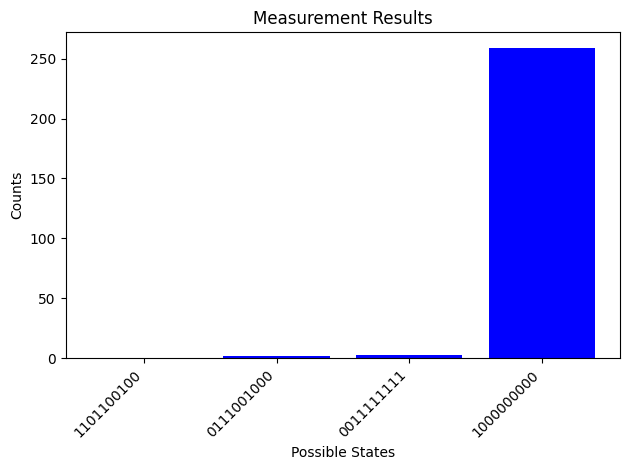

In [ ]:
quantum_encodings = {loc + intens: loc for intens, loc in input.items()} # concatenate positional and intensity encoding to fit quantum encoding format

# determine unused value to find which location was assigned to '00000000'
unused_value = None
values = ['11', '00', '10', '01']
for value in values:
    if value not in selected_values:
        unused_value = value
        break

print(unused_value)
last_encoding = str(unused_value) + '00000000'
quantum_encodings[last_encoding] = unused_value

count_results = {key: counts.get(key, 0) for key in quantum_encodings.keys()}

# Print the stored counts
for key, value in count_results.items():
    print(f"counts[{key}] = {value}")

# Plot the values
keys = list(count_results.keys())
values = list(count_results.values())

plt.bar(keys, values, color='blue')
plt.xlabel('Possible States')
plt.ylabel('Counts')
plt.title('Measurement Results')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Draw diagrams

{'01100100': '10', '11001000': '01', '11111111': '00'}


<ipython-input-9-2581dd99a301>:44: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct([8, 9], idx)
<ipython-input-9-2581dd99a301>:68: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct([8, 9], idx)
<ipython-input-9-2581dd99a301>:96: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct([8, 9], idx)
/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following rele

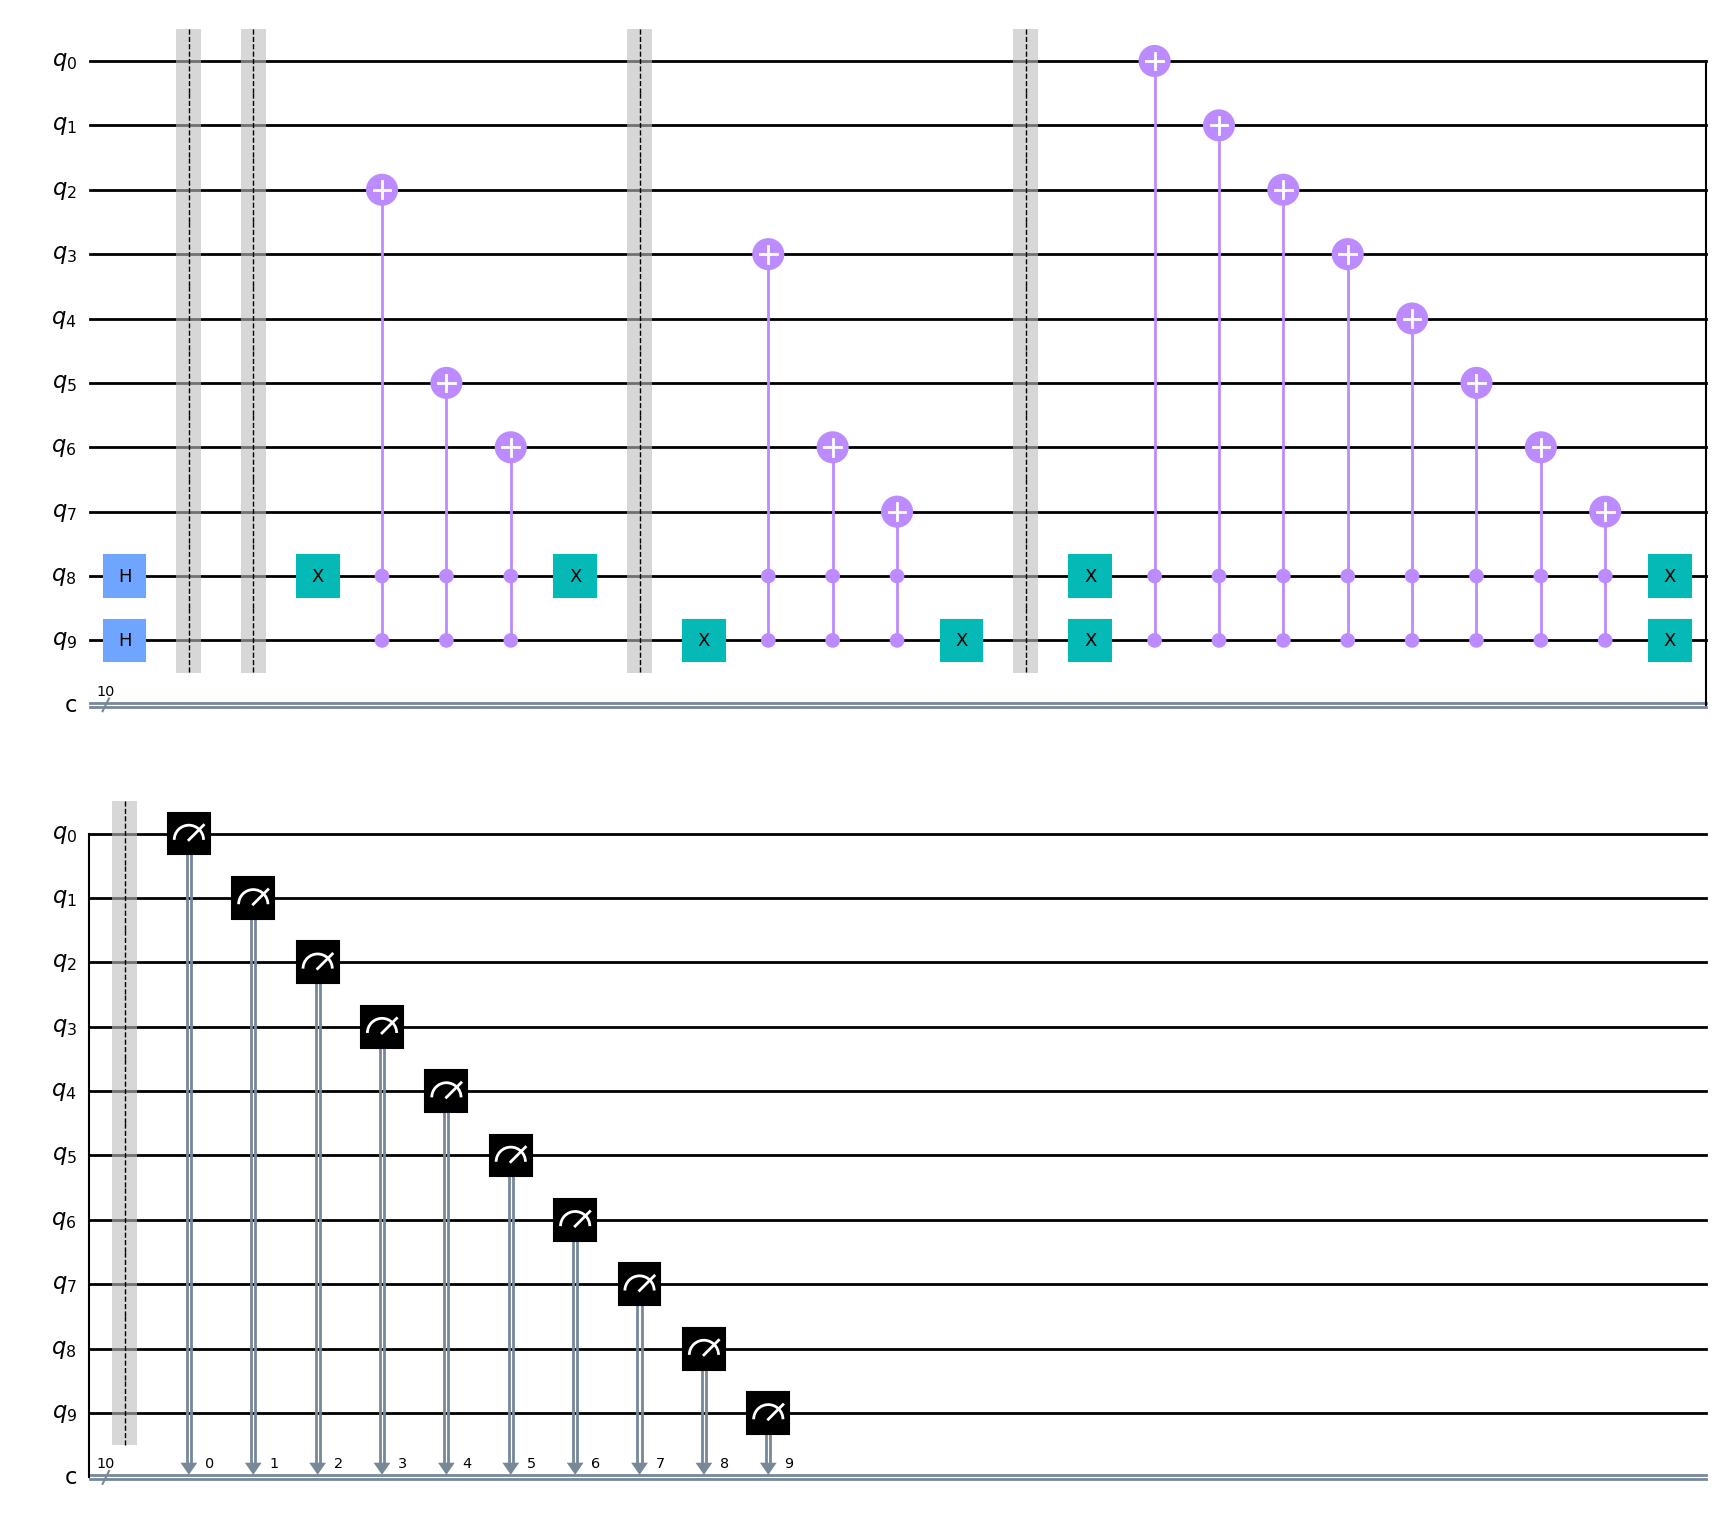

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import random

# keys represent the possible intensity values (can also randomly generate)
# values represent the pixel locations on a 2x2 grid
keys = ['01100100', '11001000', '11111111']
values = ['11', '00', '10', '01']

#Select three of the possible pixel grid locations randomly
selected_values = random.sample(values, 3)

# Shuffle the randomly selected values
random.shuffle(selected_values)

# Create input where each key is matched with some pixel location. The last location that is unassigned is inherently assigned to the key '00000000'
input = {keys[i]: selected_values[i] for i in range(len(keys))}

print(input)

# Define the quantum circuit with 10 qubits (8 for intensity and 2 for index) and 10 classical bits for measurement
qc = QuantumCircuit(10, 10)

# Apply Hadamard gates to qubits 8 and 9 (index qubits)
qc.h(8)
qc.h(9)

qc.barrier()

# barrier here only for description purposes -- this should assign the '00000000' intensity state to the appropriate pixel location

qc.barrier()

# Assigns first intensity state in keys to the appropriate location

if (input['01100100'][1] == '0'):
  qc.x(8)
if (input['01100100'][0] == '0'):
  qc.x(9)

for idx, px_value in enumerate(keys[0][::-1]):
  if(px_value=='1'):
      qc.mct([8, 9], idx)
# qc.mct([8, 9], 2)
# qc.mct([8, 9], 5)
# qc.mct([8, 9], 6)

if (input['01100100'][1] == '0'):
  qc.x(8)
if (input['01100100'][0] == '0'):
  qc.x(9)

qc.barrier()

# Assigns second intensity state in keys to the appropriate location

if (input['11001000'][1] == '0'):
  qc.x(8)
if (input['11001000'][0] == '0'):
  qc.x(9)

# qc.mct([8, 9], 3)
# qc.mct([8, 9], 6)
# qc.mct([8, 9], 7)
for idx, px_value in enumerate(keys[1][::-1]):
  if(px_value=='1'):
      qc.mct([8, 9], idx)

if (input['11001000'][1] == '0'):
  qc.x(8)
if (input['11001000'][0] == '0'):
  qc.x(9)


qc.barrier()

# Assigns thirdintensity state in keys to the appropriate location

if (input['11111111'][1] == '0'):
  qc.x(8)
if (input['11111111'][0] == '0'):
  qc.x(9)

# Apply multi-controlled Toffoli gates based on the given diagram
# qc.mct([8, 9], 0)  # multi-controlled Toffoli gate
# qc.mct([8, 9], 1)  # multi-controlled Toffoli gate
# qc.mct([8, 9], 2)  # multi-controlled Toffoli gate
# qc.mct([8, 9], 3)  # multi-controlled Toffoli gate
# qc.mct([8, 9], 4)  # multi-controlled Toffoli gate
# qc.mct([8, 9], 5)  # multi-controlled Toffoli gate
# qc.mct([8, 9], 6)  # multi-controlled Toffoli gate
# qc.mct([8, 9], 7)  # multi-controlled Toffoli gate
for idx, px_value in enumerate(keys[2][::-1]):
  if(px_value=='1'):
      qc.mct([8, 9], idx)

if (input['11111111'][1] == '0'):
  qc.x(8)
if (input['11111111'][0] == '0'):
  qc.x(9)

qc.barrier()



# # Apply measurement operations
for i in range(10):
    qc.measure(i, i)

# # Draw the circuit
qc.draw(output = "mpl")

Plot results from NEQR

In [ ]:
# Measurement results after running the NEQR circuit -- verifying that we only get the four appropriate states
import matplotlib.pyplot as plt

# Simulate backend
backend = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, backend)
job = backend.run(compiled_circuit)
result = job.result()

# Print measurement results
counts = result.get_counts(qc)
print("Measurement Results:", counts)
plot_histogram(counts)


NameError: name 'Aer' is not defined